In [2]:
import pandas as pd

# Load the dataset to examine its structure
file_path = 'C:/Users/ashut/Downloads/Orders.csv'
orders_df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
orders_df.head()


,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [3]:
# Convert 'Order Date' to datetime format
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], format='%d-%m-%Y')

# Aggregate the data by month to analyze trends
monthly_orders = orders_df.groupby(pd.Grouper(key='Order Date', freq='M')).size()

# Display the first few rows of the aggregated data
monthly_orders.head()


Order Date
2018-01-31    61
2018-02-28    54
2018-03-31    58
2018-04-30    44
2018-05-31    31
Freq: M, dtype: int64

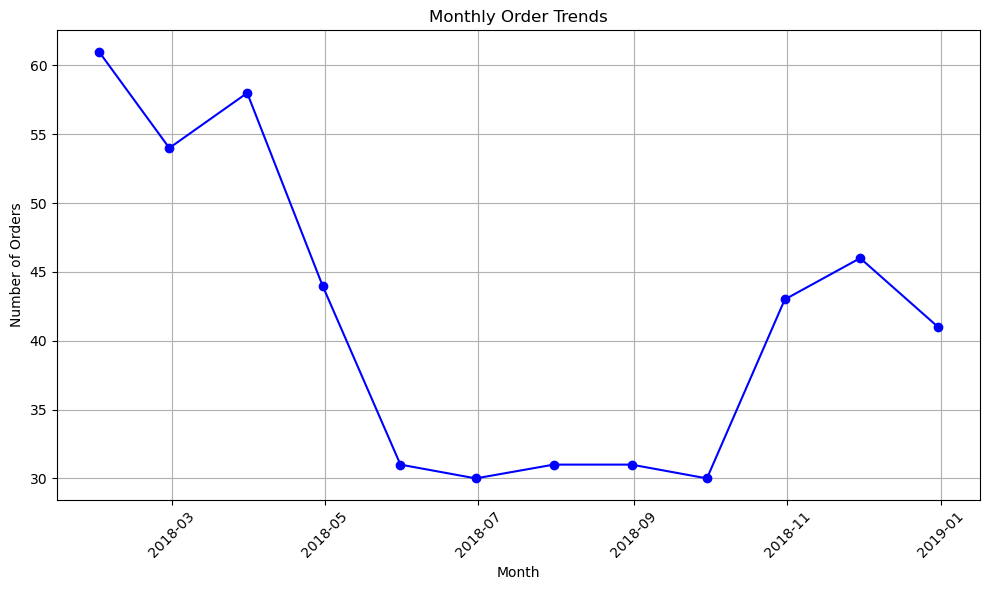

In [4]:
import matplotlib.pyplot as plt

# Plot the monthly order trends
plt.figure(figsize=(10,6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
# Prepare the dataset by aggregating orders by month
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], format='%d-%m-%Y')
monthly_orders = orders_df.groupby(pd.Grouper(key='Order Date', freq='M')).size().reset_index(name='Order Count')

# Creating lag features (1-month and 2-month lag)
monthly_orders['Previous Month Order Count'] = monthly_orders['Order Count'].shift(1)
monthly_orders['2 Month Ago Order Count'] = monthly_orders['Order Count'].shift(2)

# Drop rows with missing lag values
monthly_orders.dropna(inplace=True)

# Display the prepared data
print(monthly_orders.head())


  Order Date  Order Count  Previous Month Order Count  2 Month Ago Order Count
2 2018-03-31           58                        54.0                     61.0
3 2018-04-30           44                        58.0                     54.0
4 2018-05-31           31                        44.0                     58.0
5 2018-06-30           30                        31.0                     44.0
6 2018-07-31           31                        30.0                     31.0


In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = monthly_orders[['Previous Month Order Count', '2 Month Ago Order Count']]
y = monthly_orders['Order Count']

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")


Training set size: 8, Testing set size: 2


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate on training data
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Evaluate on testing data
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train MAE: {mae_train}, Train RMSE: {rmse_train}")
print(f"Test MAE: {mae_test}, Test RMSE: {rmse_test}")


Train MAE: 3.4299999999999993, Train RMSE: 4.472436584234593
Test MAE: 9.675, Test RMSE: 10.195187590230992


In [10]:
# Use the last two months of data to predict future orders
latest_data = monthly_orders.tail(2)[['Order Count']].values.flatten()

# Predict the next month's order count
future_data = [[latest_data[0], latest_data[1]]]  # Previous and 2 months ago data
predicted_next_month = model.predict(future_data)

print(f"Predicted orders for next month: {predicted_next_month[0]}")


Predicted orders for next month: 33.69


C:\Users\ashut\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
